In [1]:
import itertools
import json
import time
import os

In [2]:
from sympy import factorint

# Utils

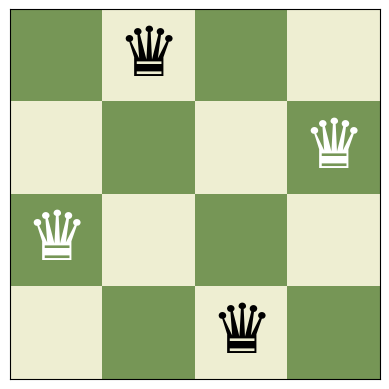

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_chess_board(matrix, fontsize=50):
    n = matrix.shape[0]
    # Create a chess board (n x n) pattern
    board = np.zeros_like(matrix)
    board[1::2, ::2] = 1
    board[::2, 1::2] = 1
    
    cmap = ListedColormap(['#769656', '#eeeed2'])
    fig, ax = plt.subplots()
    ax.imshow(board, cmap=cmap, interpolation='nearest')
    
    # Place queens based on matrix
    for i in range(n):
        for j in range(n):
            if matrix[i, j] == 1:
                ax.text(j, i, '♛', fontsize=fontsize, ha='center', va='center', color='black' if board[i, j] else 'white')
    
    # Hide the axes
    ax.set_xticks([])
    ax.set_yticks([])

# Example binary matrix
matrix = np.array([[0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [1, 0, 0, 0],
                   [0, 0, 1, 0]])

plot_chess_board(matrix)

In [4]:
factorial = lambda n: 1 if n <= 1 else n*factorial(n-1)
factorial(5)

120

In [5]:
# 0 <= num <= N! - 1
def decimal2factoradic(N, num):
    factoradic = []
    for i in range(1,N+1):
        factoradic.append(num%i)
        num //= i
    return list(reversed(factoradic))

decimal2factoradic(4, 4)

[0, 2, 0, 0]

In [6]:
def factoradic2permutation(factoriadic):
    N = len(factoriadic)
    elements = list(range(1,N+1))
    
    permutation = []
    for idx in factoriadic:
        permutation.append(elements.pop(idx))
        
    return permutation

factoradic2permutation([0,2,0,0])

[1, 4, 2, 3]

In [7]:
# Can be sped up to N*ln(N)
def permutation2factoradic(permutation):
    factoriadic = []
    N = len(permutation)
    for i in range(N):
        lt_i = 0
        for j in range(i+1,N):
            lt_i += int(permutation[j] < permutation[i])
        factoriadic.append(lt_i)
    
    return factoriadic

permutation2factoradic([1,4,2,3])

[0, 2, 0, 0]

In [8]:
def factoradic2decimal(factoriadic):
    N = len(factoriadic)
    dec = 0
    for i in reversed(range(N)):
        dec += factoriadic[i] * factorial(N-1-i)
        
    return dec

factoradic2decimal([0,2,0,0])

4

In [9]:
def board2permutation(board):
    N = len(board)
    perm = []
    for i in range(N):
        for j in range(N):
            if board[i][j]: perm.append(j+1)
                
    return perm

board2permutation([[0,1,0,0],
                   [0,0,0,1],
                   [1,0,0,0],
                   [0,0,1,0]])

[2, 4, 1, 3]

In [10]:
def permutation2board(perm):
    N = len(perm)
    board = [[0] * N for _ in range(N)]
    
    for i in range(N):
        board[i][perm[i]-1] = 1
        
    return board

permutation2board([2,4,1,3])

[[0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0]]

In [24]:
class NQueen_sym90:
    def __init__(self, N):
        self.N = N
        self.solutions = set()
        self.board = [[0]*N for _ in range(N)]

    def solve_symmetric_nqueen(self, num_placed=0, row=0, rows=set(), cols=set(), diags=set(), anti_diags=set()):
        if num_placed == self.N:
            return self.solutions.add(factoradic2decimal(permutation2factoradic(board2permutation(self.board))))

        if row in rows:
            return self.solve_symmetric_nqueen(num_placed, row+1, rows, cols, diags, anti_diags)

        for col in range(self.N):
            if col in cols or (col - row) in diags or (col + row) in anti_diags: continue
            overlap = self._add_to_sets(row,col,rows,cols,diags,anti_diags)
            self._add_to_board(row,col)
            
            if not overlap:
                self.solve_symmetric_nqueen(num_placed+4, row+1, rows, cols, diags, anti_diags)

            self._remove_from_board(row,col)
            self._remove_from_sets(row,col,rows,cols,diags,anti_diags)
            
    def _add_to_sets(self, row, col, rows, cols, diags, anti_diags):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]

        for i,j in zip(_rows,_cols):
            if i in rows or j in cols or j-i in diags or j+i in anti_diags: return True # overlap is true
            rows.add(i)
            cols.add(j)
            diags.add(j-i)
            anti_diags.add(j+i)
        return False # overlap is false

    def _remove_from_sets(self, row, col, rows, cols, diags, anti_diags):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            if i in rows: rows.remove(i)
            if j in cols: cols.remove(j)
            if j-i in diags: diags.remove(j-i)
            if j+i in anti_diags: anti_diags.remove(j+i)

    def _add_to_board(self, row, col):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            self.board[i][j] = 1
            
    def _remove_from_board(self, row, col):
        _rows = [row, col, self.N-1-row, self.N-1-col]
        _cols = [col, self.N-1-row, self.N-1-col, row]
        for i,j in zip(_rows, _cols):
            self.board[i][j] = 0
            

for N in range(1, 28+1):
    print("-"*100)
    print(N)
    solver = NQueen_sym90(N)
    if N%2 == 0:
        solver.solve_symmetric_nqueen()
    else:
        solver.board[N//2][N//2] = 1
        solver.solve_symmetric_nqueen(1,0,set([(N-1)//2]),set([(N-1)//2]),set([0]),set([N-1]))
    result = len(solver.solutions)
        
    print(result)
    factors = factorint(result)
    print([v for row in [[factor]*power for (factor, power) in factors.items()] for v in row])

----------------------------------------------------------------------------------------------------
1
1
[]
----------------------------------------------------------------------------------------------------
2
0
[0]
----------------------------------------------------------------------------------------------------
3
0
[0]
----------------------------------------------------------------------------------------------------
4
2
[2]
----------------------------------------------------------------------------------------------------
5
2
[2]
----------------------------------------------------------------------------------------------------
6
0
[0]
----------------------------------------------------------------------------------------------------
7
0
[0]
----------------------------------------------------------------------------------------------------
8
0
[0]
----------------------------------------------------------------------------------------------------
9
0
[0]
--------------------

# Line-method
Algorithm that tries to cover N-Queen configuration with as few straight lines as possible modulo rotation by $90$ degrees.

In [31]:
N = 32

In [32]:
solver = NQueen_sym90(N)
solver.solve_symmetric_nqueen()
Qs = solver.solutions.copy()
len(Qs)

406784

In [ ]:
# Q = permutation2board(factoradic2permutation(decimal2factoradic(N, Qs_num)))